In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
df = pd.read_csv("../data/raw/notes_epl.csv")
df.head()

,ID_Etudiant,Nom,Prenom,Departement,Grade,Annee_etude,Filière,Code_UE,Nom_UE,Code_Matiere,...,Enseignant,Note_Devoir,Note_Examen,Note_Finale,Reussite,Date_Devoir,Date_Examen,Session,Coefficient_Devoir,Coefficient_Examen
0,ETU0001,Thomas,Alexandre,Génie Informatique,Licence professionnelle,2,Génie Logiciel,INF2101,Algorithmique Avancée,1INF2101,...,Marthe Pons,11.8,11.2,11.4,True,2025-07-13,2025-12-16,Principale,0.4,0.6
1,ETU0001,Thomas,Alexandre,Génie Informatique,Licence professionnelle,2,Génie Logiciel,INF2101,Algorithmique Avancée,2INF2101,...,Théophile Baudry,12.3,13.1,12.8,True,2025-11-01,2025-11-28,Principale,0.4,0.6
2,ETU0001,Thomas,Alexandre,Génie Informatique,Licence professionnelle,2,Génie Logiciel,INF2101,Algorithmique Avancée,3INF2101,...,Alain Petit de la Blot,15.0,11.9,13.1,True,2025-11-15,2025-12-06,Rattrapage,0.4,0.6
3,ETU0001,Thomas,Alexandre,Génie Informatique,Licence professionnelle,2,Génie Logiciel,INF2102,Développement Logiciel,1INF2102,...,William Gros,15.3,13.8,14.4,True,2025-08-11,2025-12-05,Principale,0.4,0.6
4,ETU0001,Thomas,Alexandre,Génie Informatique,Licence professionnelle,2,Génie Logiciel,INF2102,Développement Logiciel,2INF2102,...,Valérie Hardy-Martinez,13.8,11.6,12.5,True,2025-08-18,2025-12-03,Principale,0.4,0.6


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Etudiant         18000 non-null  object 
 1   Nom                 18000 non-null  object 
 2   Prenom              18000 non-null  object 
 3   Departement         18000 non-null  object 
 4   Grade               18000 non-null  object 
 5   Annee_etude         18000 non-null  int64  
 6   Filière             18000 non-null  object 
 7   Code_UE             18000 non-null  object 
 8   Nom_UE              18000 non-null  object 
 9   Code_Matiere        18000 non-null  object 
 10  Matiere             18000 non-null  object 
 11  Enseignant          18000 non-null  object 
 12  Note_Devoir         18000 non-null  float64
 13  Note_Examen         18000 non-null  float64
 14  Note_Finale         18000 non-null  float64
 15  Reussite            18000 non-null  bool   
 16  Date

In [24]:
df.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
Note_Devoir,18000.0,12.431983,5.012095e+00,0.0,9.0,12.7,16.3,20.0
Note_Examen,18000.0,12.399250,5.254424e+00,0.0,8.7,12.7,16.6,20.0
Note_Finale,18000.0,12.412389,4.814535e+00,0.0,9.1,12.7,16.2,20.0
Coefficient_Devoir,18000.0,0.400000,5.551269e-17,0.4,0.4,0.4,0.4,0.4
Coefficient_Examen,18000.0,0.600000,1.110254e-16,0.6,0.6,0.6,0.6,0.6


In [25]:
df.describe(include='object').T

,count,unique,top,freq
ID_Etudiant,18000,2000,ETU1984,9
Nom,18000,396,Giraud,153
Prenom,18000,215,Amélie,180
Departement,18000,4,Génie Informatique,6435
Grade,18000,5,Licence Fondamentale,4041
Filière,18000,20,IA et Big Data,1395
Code_UE,18000,60,INF2401,465
Nom_UE,18000,60,Intelligence Artificielle,465
Code_Matiere,18000,180,2INF2403,155
Matiere,18000,180,Bases NoSQL,155


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Prepare data for linear regression
# Select numerical features
numerical_cols = ['Note_Devoir', 'Note_Examen', 'Coefficient_Devoir', 'Coefficient_Examen', 'Annee_etude']
X = df[numerical_cols]
y = df['Note_Finale']

# Handle any missing values if present
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Print coefficients
print("Coefficients:")
for feature, coef in zip(numerical_cols, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Mean Squared Error: 0.0008
R-squared: 1.0000
Coefficients:
Note_Devoir: 0.4000
Note_Examen: 0.6000
Coefficient_Devoir: 0.0000
Coefficient_Examen: 0.0000
Annee_etude: 0.0003
Intercept: -0.0008


In [32]:
# Analyse exploratoire des données
# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# Statistiques descriptives pour les variables numériques
print("\nStatistiques descriptives :")
print(df.describe())

# Distribution de la variable cible Reussite
print("\nDistribution de Reussite :")
print(df['Reussite'].value_counts(normalize=True))

Valeurs manquantes par colonne :
ID_Etudiant           0
Nom                   0
Prenom                0
Departement           0
Grade                 0
Annee_etude           0
Filière               0
Code_UE               0
Nom_UE                0
Code_Matiere          0
Matiere               0
Enseignant            0
Note_Devoir           0
Note_Examen           0
Note_Finale           0
Reussite              0
Date_Devoir           0
Date_Examen           0
Session               0
Coefficient_Devoir    0
Coefficient_Examen    0
dtype: int64

Statistiques descriptives :
        Annee_etude   Note_Devoir   Note_Examen   Note_Finale  \
count  18000.000000  18000.000000  18000.000000  18000.000000   
mean       1.655500     12.431983     12.399250     12.412389   
std        0.725154      5.012095      5.254424      4.814535   
min        1.000000      0.000000      0.000000      0.000000   
25%        1.000000      9.000000      8.700000      9.100000   
50%        2.000000     12.7000

Matrice de corrélation :
                    Note_Devoir  Note_Examen  Note_Finale  Coefficient_Devoir  \
Note_Devoir            1.000000     0.729412     0.894043                 NaN   
Note_Examen            0.729412     1.000000     0.958553                 NaN   
Note_Finale            0.894043     0.958553     1.000000                 NaN   
Coefficient_Devoir          NaN          NaN          NaN                 NaN   
Coefficient_Examen          NaN          NaN          NaN                 NaN   
Annee_etude            0.003432     0.002513     0.003094                 NaN   

                    Coefficient_Examen  Annee_etude  
Note_Devoir                        NaN     0.003432  
Note_Examen                        NaN     0.002513  
Note_Finale                        NaN     0.003094  
Coefficient_Devoir                 NaN          NaN  
Coefficient_Examen                 NaN          NaN  
Annee_etude                        NaN     1.000000  


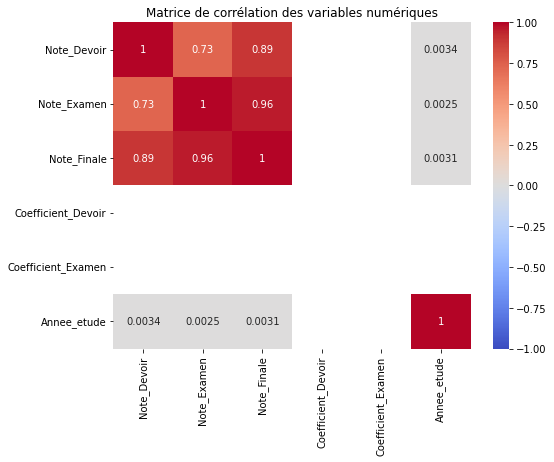

In [33]:
# Matrice de corrélation pour les variables numériques
numerical_cols = ['Note_Devoir', 'Note_Examen', 'Note_Finale', 'Coefficient_Devoir', 'Coefficient_Examen', 'Annee_etude']
corr_matrix = df[numerical_cols].corr()
print("Matrice de corrélation :")
print(corr_matrix)

# Visualisation de la corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

Taux de réussite par département :
Departement
Génie Civil           0.725047
Génie Mécanique       0.712682
Génie Électrique      0.685052
Génie Informatique    0.680963
Name: Reussite, dtype: float64


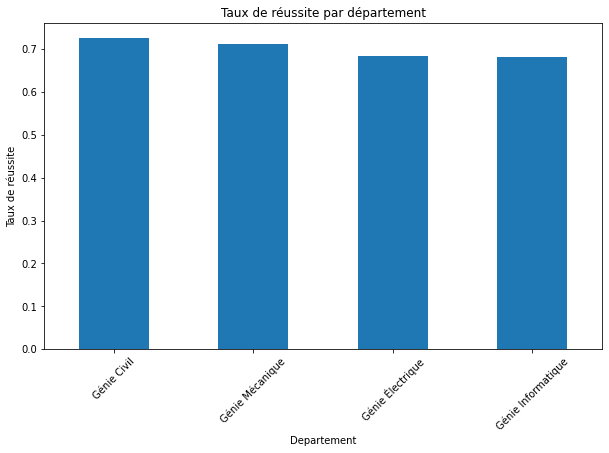


Taux de réussite par filière :
Filière
Bâtiment et Travaux Publics       0.786517
Énergétique et Thermodynamique    0.748718
Hydraulique et Environnement      0.742574
Production Industrielle           0.731746
Réseaux Intelligents              0.727173
Robotique Avancée                 0.723684
Énergies Renouvelables            0.717284
Système Informatique              0.711111
Géotechnique                      0.703268
Électrotechnique                  0.700483
Urbanisme et Transport            0.699670
Conception Mécanique              0.699126
Génie Structural                  0.695602
Système et réseaux                0.688889
Génie Logiciel                    0.681917
Matériaux et Procédés             0.678241
Logistique                        0.673953
IA et Big Data                    0.650896
Électronique de Puissance         0.641975
Automatique et Contrôle           0.626478
Name: Reussite, dtype: float64


In [34]:
# Analyse par département : taux de réussite moyen
success_rate_by_dept = df.groupby('Departement')['Reussite'].mean().sort_values(ascending=False)
print("Taux de réussite par département :")
print(success_rate_by_dept)

# Visualisation
plt.figure(figsize=(10, 6))
success_rate_by_dept.plot(kind='bar')
plt.title('Taux de réussite par département')
plt.ylabel('Taux de réussite')
plt.xticks(rotation=45)
plt.show()

# Analyse par filière
success_rate_by_filiere = df.groupby('Filière')['Reussite'].mean().sort_values(ascending=False)
print("\nTaux de réussite par filière :")
print(success_rate_by_filiere)

In [35]:
# Modèle de classification pour prédire Reussite
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encoder les variables catégorielles
le_dept = LabelEncoder()
le_filiere = LabelEncoder()
le_grade = LabelEncoder()

df_encoded = df.copy()
df_encoded['Departement'] = le_dept.fit_transform(df['Departement'])
df_encoded['Filière'] = le_filiere.fit_transform(df['Filière'])
df_encoded['Grade'] = le_grade.fit_transform(df['Grade'])

# Features pour la classification
features_class = ['Note_Devoir', 'Note_Examen', 'Coefficient_Devoir', 'Coefficient_Examen', 'Annee_etude', 'Departement', 'Filière', 'Grade']
X_class = df_encoded[features_class]
y_class = df_encoded['Reussite'].astype(int)  # Convertir bool à int

# Split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Modèle Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

# Prédictions
y_pred_class = clf.predict(X_test_class)

# Évaluation
print("Accuracy pour la classification de Reussite :", accuracy_score(y_test_class, y_pred_class))
print("\nRapport de classification :")
print(classification_report(y_test_class, y_pred_class))

# Importance des features
feature_importances = pd.Series(clf.feature_importances_, index=features_class).sort_values(ascending=False)
print("\nImportance des features :")
print(feature_importances)

Accuracy pour la classification de Reussite : 0.9938888888888889

Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1076
           1       1.00      0.99      1.00      2524

    accuracy                           0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600


Importance des features :
Note_Examen           0.583429
Note_Devoir           0.394905
Filière               0.010675
Grade                 0.004572
Annee_etude           0.003681
Departement           0.002737
Coefficient_Examen    0.000000
Coefficient_Devoir    0.000000
dtype: float64
